In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/diabetes-prediction')

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Diabetes Pedigree Function:   
indicates the function which scores likelihood of diabetes based on family history. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

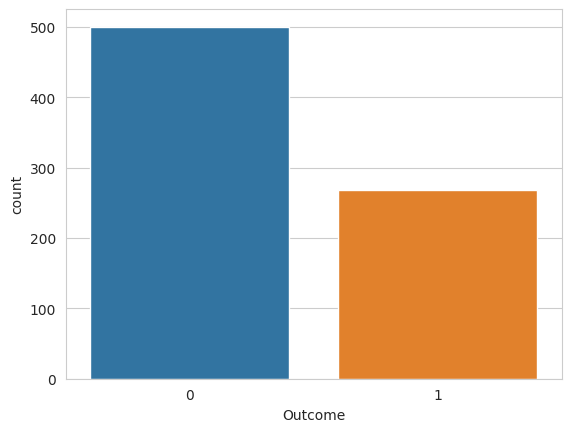

In [8]:
# Number of people with diabetes
sns.set_style('whitegrid')
sns.countplot(x = 'Outcome', data=data)

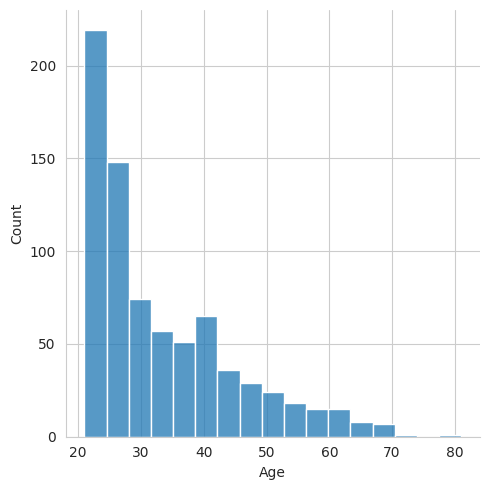

In [9]:
# Consider the age of diabetes
sns.displot(data['Age'], kde=False)

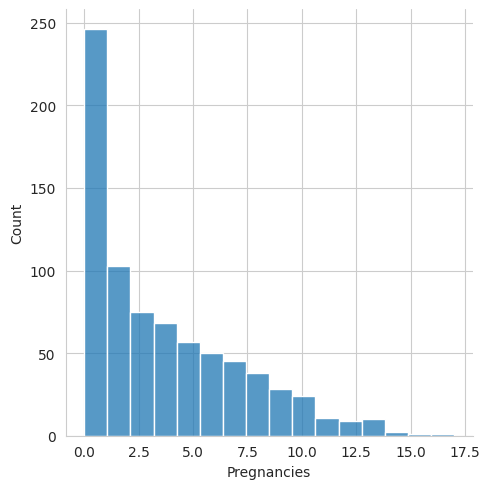

In [10]:
# Number of Pregnancy Pregnancies
sns.displot(data['Pregnancies'], kde=False)

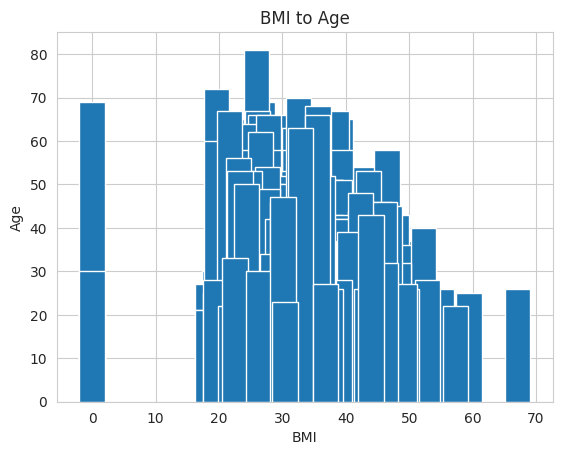

In [11]:
# BMI according to age
x = data['BMI']
y = data['Age']
plt.title('BMI to Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.bar(x,y,width = 4)
plt.show()

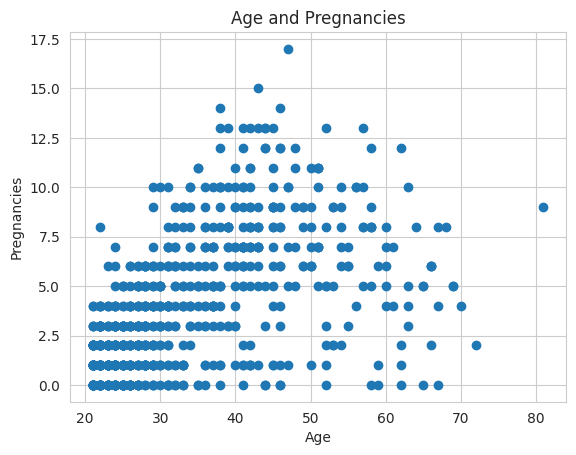

In [12]:
x_age = data['Age']
y_Pregnancies = data['Pregnancies']
plt.title('Age and Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(x_age,y_Pregnancies,)
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

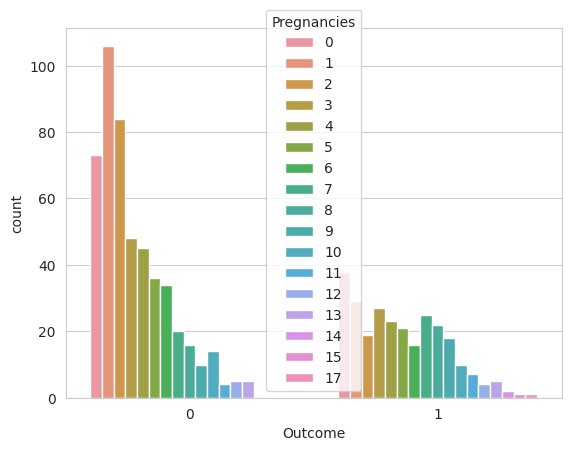

In [13]:
# The amount of pregnancy in the body linked to diabetes
sns.countplot(x='Outcome', hue = 'Pregnancies', data = data)

In [14]:
data_1 = []
for i in range (0,len(data['Age'])):
  if(data['Outcome'].iloc[i] == 1):
    data_1.append(data['Age'].iloc[i])

In [15]:
# The average age of confirmed cases
import numpy as np
np.mean(data_1)

37.06716417910448

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
data_Pr = []
data_glu = []
data_Bl = []
data_Sk = []
data_Ins = []
data_BM = []
data_DI = []

for i in range (0,len(data['Age'])):
  if(data['Outcome'].iloc[i] == 1):
    data_Pr.append(data['Pregnancies'].iloc[i])
    data_glu.append(data['Glucose'].iloc[i])
    data_Bl.append(data['BloodPressure'].iloc[i])
    data_Sk.append(data['SkinThickness'].iloc[i])
    data_Ins.append(data['Insulin'].iloc[i])
    data_BM.append(data['BMI'].iloc[i])
    data_DI.append(data['DiabetesPedigreeFunction'].iloc[i])

print ('Mean of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction to Outcome_1: ')
print('Pregnancies: ',np.mean(data_Pr))
print('Glucose: ', np.mean(data_glu))
print('BloodPressure: ',np.mean(data_Bl))
print('SkinThickness: ', np.mean(data_Sk))
print('Insulin: ',np.mean(data_Ins))
print('BMI: ', np.mean(data_BM))
print('DiabetesPedigreeFunction: ',np.mean(data_DI))


Mean of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction to Outcome_1: 
Pregnancies:  4.865671641791045
Glucose:  141.25746268656715
BloodPressure:  70.82462686567165
SkinThickness:  22.16417910447761
Insulin:  100.33582089552239
BMI:  35.14253731343284
DiabetesPedigreeFunction:  0.5505


In [18]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
mean  = [np.mean(data_1), np.mean(data_Pr), np.mean(data_glu), np.mean(data_Bl), np.mean(data_Sk),np.mean(data_Ins), np.mean(data_BM),np.mean(data_DI)]
data_mean = pd.DataFrame({'Column' : column, 'Mean':mean})
print(data_mean)

                     Column        Mean
0               Pregnancies   37.067164
1                   Glucose    4.865672
2             BloodPressure  141.257463
3             SkinThickness   70.824627
4                   Insulin   22.164179
5                       BMI  100.335821
6  DiabetesPedigreeFunction   35.142537
7                       Age    0.550500


Train Model

In [19]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',\
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 38)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.score(X_train, y_train)

0.7687296416938111

In [26]:
model.score(X_test, y_test)

0.7857142857142857

In [27]:
predict = model.predict(X_test)

In [28]:
predict

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
Xtest = X_test.iloc[1]
Xtest

Pregnancies                   2.000
Glucose                     197.000
BloodPressure                70.000
SkinThickness                99.000
Insulin                       0.000
BMI                          34.700
DiabetesPedigreeFunction      0.575
Age                          62.000
Name: 579, dtype: float64

In [30]:
BO = model.intercept_
BO

array([-7.83539425])

In [31]:
# B1, B2..
Bi = model.coef_
Bi

array([[ 0.12513779,  0.03719165, -0.01798794,  0.00186274, -0.00129246,
         0.07876437,  0.61101296,  0.01465224]])

In [32]:
f = BO + Bi[0][0]*Xtest[0] + Bi[0][1]*Xtest[1] + Bi[0][2]*Xtest[2] + Bi[0][3]*Xtest[3] + Bi[0][4]*Xtest[4]\
+ Bi[0][5]*Xtest[5] + Bi[0][6]*Xtest[6]  + Bi[0][7]*Xtest[7]  

In [33]:
f


array([2.6597878])

In [34]:
import math 
P_Y = ((math.e**f) / (1+math.e**f)).round()
P_Y # P_Y is the prediction result of the first person data -> 0.12 we round to 0

array([1.])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       101
           1       0.75      0.57      0.65        53

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.78      0.79      0.78       154

